### Load and plot raw temperature data

Create `total_temperature_over_time.png` plot.

April 7, 2025

In [12]:
from horemheb.config import AnalysisConfig
from horemheb.loader import load_temperature_data
from horemheb.segments import process_segments
from horemheb.paths import data_dir

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [21]:
# Configure analysis parameters
config = AnalysisConfig(
    delay_time=0, #80, #300, #240, #80, #240, #180, #120,
    before_sunrise_delta_minutes=0,
    resample_minutes=5
)

#temperature_data_file_old_door = 'temperature_logB_12.csv'
temperature_data_file = 'temperature_logC_2025-03-12.csv'

# Filter New Door data after the specified timestamp
#cutoff_time = '2025-02-27 19:48:04'
cutoff_time_str = '2025-02-27 19:48:04'
cutoff_time = pd.Timestamp(cutoff_time_str)

In [22]:
df, df_r1, df_r2 = load_temperature_data(
    data_dir / temperature_data_file,
    config,
    #cutoff_time=cutoff_time,
    #comparison='<='
)

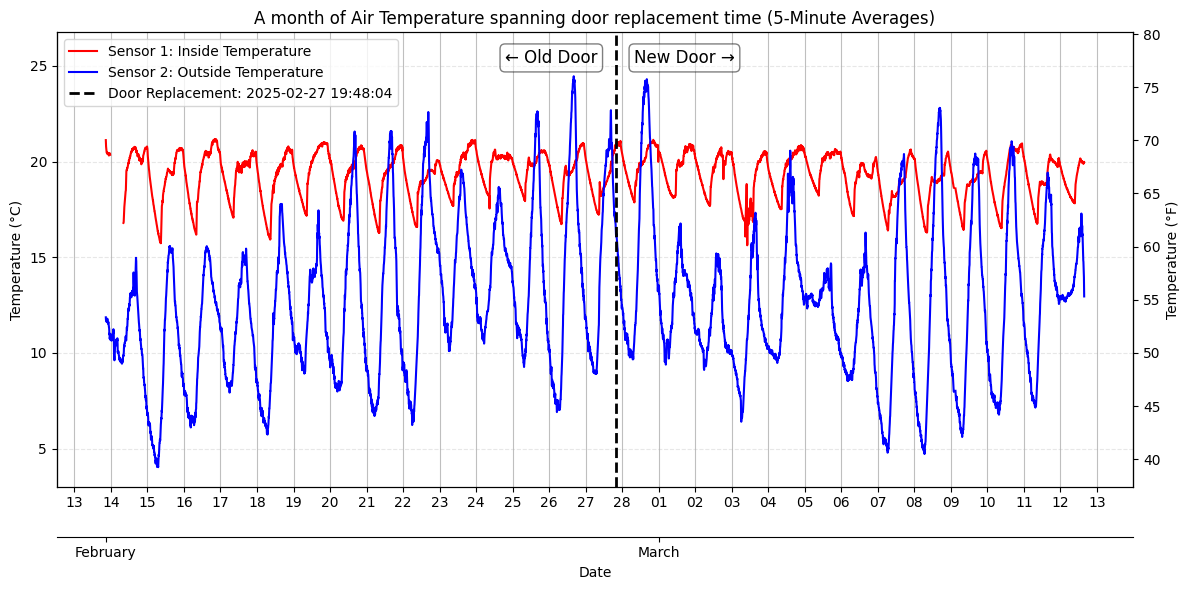

In [32]:
# Create the figure and axis with a larger size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create secondary axis for Fahrenheit
ax2 = ax1.twinx()

# Plot on primary axis (Celsius)
# Original data (thinner lines)
#ax1.plot(df['timestamp'], df['temp1'], '-r', linewidth=0.5, alpha=0.4, label=None) #'Sensor 1 (Raw)')
#ax1.plot(df['timestamp'], df['temp2'], '-b', linewidth=0.5, alpha=0.4, label=None) #'Sensor 2 (Raw)')

# Plot averaged temperature vs time (thicker lines)
ax1.plot(df_r1.index, df_r1.values, '-r', linewidth=1.5, label=f'Sensor 1: Inside Temperature') # ({config.resample_minutes}min avg)')
ax1.plot(df_r2.index, df_r2.values, '-b', linewidth=1.5, label=f'Sensor 2: Outside Temperature') # ({config.resample_minutes}min avg)')

# Customize the plot
ax1.set_title(f'A month of Air Temperature spanning door replacement time ({config.resample_minutes}-Minute Averages)')
#ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)')
ax2.set_ylabel('Temperature (°F)')

# Set up Fahrenheit axis limits based on Celsius limits
c_min, c_max = ax1.get_ylim()
c_max *= 1.05
ax1.set_ylim(c_min, c_max)
ax2.set_ylim((c_min * 9/5 + 32), (c_max * 9/5 + 32))

# Add vertical line at cutoff_time
ax1.axvline(cutoff_time, color='black', linestyle='--', linewidth=2, label=f'Door Replacement: {cutoff_time_str}')

# Add "Old" and "New" labels with arrows near the top
y_pos_text = c_max * 0.95  # Position text near the top of the plot
x_offset = pd.Timedelta(hours=12) # Offset text slightly from the line

ax1.text(cutoff_time - x_offset, y_pos_text, '← Old Door',
         ha='right', va='center', fontsize=12, color='black',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.3'))
ax1.text(cutoff_time + x_offset, y_pos_text, 'New Door →',
         ha='left', va='center', fontsize=12, color='black',
         bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.3'))


ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Just the day number
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every 'interval' day

# Create custom 6-hour locator for minor ticks
#ax1.xaxis.set_minor_locator(mdates.HourLocator(byhour=[0, 12]))  # Reduce to just midnight and noon
#ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))  # Hour format

# Set up grid with different styles for midnight and 6-hour marks
ax1.grid(True, which='major', axis='x', linestyle='-', color='gray', alpha=0.5)  # Darker midnight lines
ax1.grid(True, which='minor', axis='x', linestyle='-', color='gray', alpha=0.2)  # Lighter 6-hour lines
ax1.grid(True, axis='y', linestyle='--', alpha=0.3)  # Regular horizontal grid

# Add second x-axis for months
ax3 = ax1.twiny()
ax3.spines['top'].set_visible(False)  # Hide the top spine
ax3.xaxis.set_ticks_position('bottom')  # Put ticks on bottom
ax3.xaxis.set_label_position('bottom')  # Put label on bottom
ax3.spines['bottom'].set_position(('outward', 36))  # Move axis down

# Set the same x-limits as the main axis
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks([df['timestamp'].min(), pd.Timestamp('2025-03-01')])  # Set ticks at start of each month
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Month name format

ax3.set_xlabel('Date')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()